### Decison Tree Regressor
breve descrizione

Inizialmente proviamo ad effetturare un semplice test con un ampio intervallo di max_leaves per notare come si comporta l'algoritmo su due dataset differenti, uno contiene tutte le features mentre in X_train_nons rimuoviamo la nostra feature custom Neighborhood_Score.
Scegliamo inoltre una max_depth di 10 e un min_samples_leaf di 15 per andare a limitare l'overfitting.

FRIEDMAN_MSE
2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
FRIEDMAN_MSE
3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
FRIEDMAN_MSE
4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
FRIEDMAN_MSE
5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
FRIEDMAN_MSE
6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
FRIEDMAN_MSE
7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
FRIEDMAN_MSE
8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
FRIEDMAN_MSE
9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
FRIEDMAN_MSE
10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
FRIEDMAN_MSE
11 TRAIN:  0.7984645474801348 TEST:  0.7912785052223217
FRIEDMAN_MSE
12 TRAIN:  0.8055146216068162 TEST:  0.7988019391794081
FRIEDMAN_MSE
13 TRAIN:  0.8119451695269633 TEST:  0.8181112951048521
FRIEDMAN_MSE
14 TRAIN:  0.8172838275060825 TEST:  0.8240213207913929
FRIEDMAN_MSE
15 TRAIN:  0.8210000503134943 TEST:  0.8244546360725103
FRIEDMAN_MSE
16 TRAIN:  0.8244334832646557

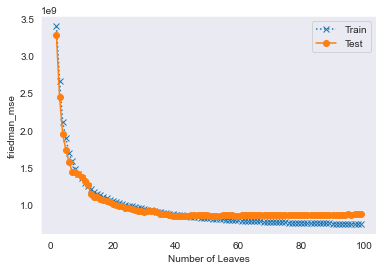

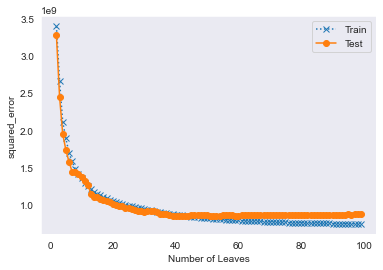

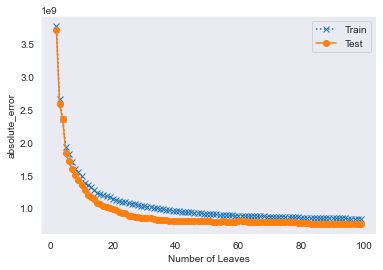

In [8]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

X_train_nons = X_train.drop(columns=['Neighborhood_Score'])
X_test_nons = X_test.drop(columns=['Neighborhood_Score'])

dt_try = DecisionTreeRegressor()
criterions = ['friedman_mse', 'squared_error', 'absolute_error']

for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        #Posso anche modificare max depth
        dt_model.fit(X_train_nons,y_train)
        # compute Accuracy
        print("n_iter=",max_leaves,"TRAIN: ", dt_model.score(X_train_nons, y_train), "TEST: ", dt_model.score(X_test_nons,y_test))
        train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train_nons))
        test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test_nons))
        errors += [ [max_leaves, train_acc, test_acc] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

FRIEDMAN_MSE
2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
FRIEDMAN_MSE
3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
FRIEDMAN_MSE
4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
FRIEDMAN_MSE
5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
FRIEDMAN_MSE
6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
FRIEDMAN_MSE
7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
FRIEDMAN_MSE
8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
FRIEDMAN_MSE
9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
FRIEDMAN_MSE
10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
FRIEDMAN_MSE
11 TRAIN:  0.7984645474801348 TEST:  0.7912785052223217
FRIEDMAN_MSE
12 TRAIN:  0.8055146216068162 TEST:  0.7988019391794081
FRIEDMAN_MSE
13 TRAIN:  0.8119451695269633 TEST:  0.8181112951048521
FRIEDMAN_MSE
14 TRAIN:  0.8172838275060825 TEST:  0.8240213207913929
FRIEDMAN_MSE
15 TRAIN:  0.8210000503134943 TEST:  0.8244546360725103
FRIEDMAN_MSE
16 TRAIN:  0.8244334832646557

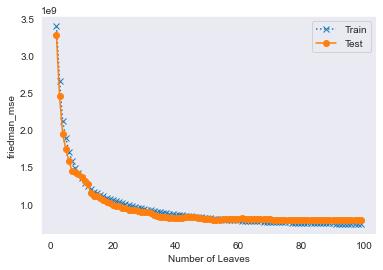

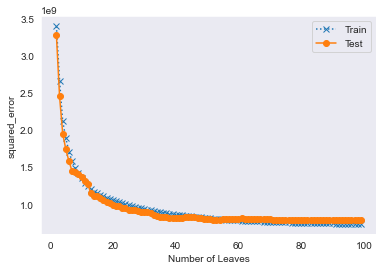

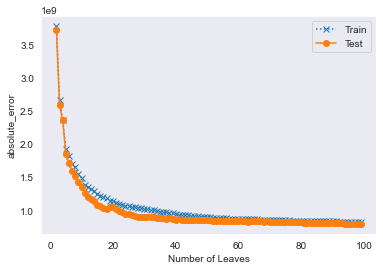

In [9]:
dt_try = DecisionTreeRegressor()
criterions = ['friedman_mse', 'squared_error', 'absolute_error']

for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        #Posso anche modificare max depth
        dt_model.fit(X_train,y_train)
        # compute Accuracy
        print("n_iter=",max_leaves,"TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))

        train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train))
        test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test))
        errors += [ [max_leaves, train_acc, test_acc] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

# Choose if mantain the costum feature
Possiamo notare dai grafici e dalle osservazioni numeriche come la feature Neighborhood Score spieghi / dia informazione al modello. Quindi decidiamo di mantenerla.

# Choosing to mantain or not the components of custom features

FRIEDMAN_MSE
2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
FRIEDMAN_MSE
3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
FRIEDMAN_MSE
4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
FRIEDMAN_MSE
5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
FRIEDMAN_MSE
6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
FRIEDMAN_MSE
7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
FRIEDMAN_MSE
8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
FRIEDMAN_MSE
9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
FRIEDMAN_MSE
10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
FRIEDMAN_MSE
11 TRAIN:  0.7967218835767551 TEST:  0.7857327179336083
FRIEDMAN_MSE
12 TRAIN:  0.8037719577034365 TEST:  0.7932561518906946
FRIEDMAN_MSE
13 TRAIN:  0.8102025056235835 TEST:  0.8125655078161388
FRIEDMAN_MSE
14 TRAIN:  0.8155411636027028 TEST:  0.8184755335026797
FRIEDMAN_MSE
15 TRAIN:  0.8192573864101147 TEST:  0.818908848783797
FRIEDMAN_MSE
16 TRAIN:  0.822690819361276 T

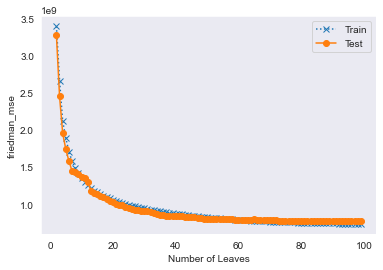

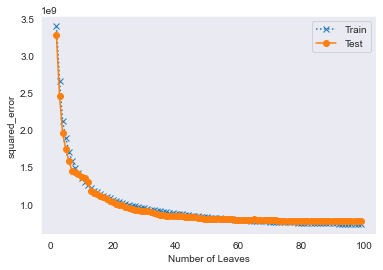

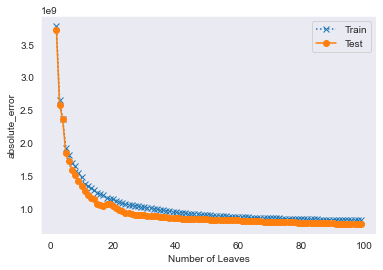

In [12]:
oh_neighbor = []
for col in X_train.columns:
    if 'Neighborhood_b' in col:
        oh_neighbor.append(col)

X_train_modified = X_train.drop(columns=oh_neighbor)
X_test_modified= X_test.drop(columns=oh_neighbor)

porch = ['Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch']
surface = ['Total_Finished_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Garage_Area']
baths = ['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

X_train_modified = X_train_modified.drop(columns=porch)
X_test_modified = X_test_modified.drop(columns=porch)

X_train_modified = X_train_modified.drop(columns=surface)
X_test_modified = X_test_modified.drop(columns=surface)

X_train_modified = X_train_modified.drop(columns=baths)
X_test_modified = X_test_modified.drop(columns=baths)


dt_try = DecisionTreeRegressor()
criterions = ['friedman_mse', 'squared_error', 'absolute_error']

for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        #Posso anche modificare max depth
        dt_model.fit(X_train_modified,y_train)
        # compute Accuracy
        print("n_iter=",max_leaves,"TRAIN: ", dt_model.score(X_train_modified, y_train), "TEST: ", dt_model.score(X_test_modified,y_test))

        train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train_modified))
        test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test_modified))
        errors += [ [max_leaves, train_acc, test_acc] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()


# Remarks on the removals of removed variables
The learning curve seems to improve slightly, but we do not have noticeable differences, however, this indicates to us that the removed features were not incisive on the model's explainabilities.
So we are not going to add them back in but remove them permanently.

# Hyperparameter Tuning
Using the GridSearchCV function provided by sklearn to perform a hyper parameter tuning by choosing a list of parameter combinations to try.
It's important to specify the number of cross-fold validation, this technique will go to perform different tests with different "cuts" of the dataset train, thus going to find parameters that do not work only in the case of "a specific observations" but at a general level.
This technique is used to obtain a stable model that does not stop working as soon as the testing dataset is changed.
![](../../Downloads/grid_search_cross_validation.png)

In [10]:
from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
            "max_features":['auto','log2','sqrt',None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train_modified,y_train)

tuning_model=GridSearchCV(
reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train_modified,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

Fitting 5 folds for each of 38400 candidates, totalling 192000 fits



KeyboardInterrupt



# Improving Hyperparameter tuning
Thanks to the previous observations, we are able to obtain a more limited number of parameters to test while also trying to reduce overfitting as best we can by taking advantage of max_depthe and min_samples_leaf.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["absolute_error"],
            "splitter":["best"],
            "max_depth" : range(1,13),
            "min_samples_leaf":range(1,16),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train_modified,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=2,
    verbose=2,n_jobs= -1)

tuning_model.fit(X_train_modified,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

In [ ]:
tuning_model.cv_results_['mean_test_score'][tuning_model.best_index_]

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

errors = []
for n in range(25,51): #44-45 best one 43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
                        #43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
    dt_model = DecisionTreeRegressor(max_leaf_nodes=80, max_depth=9, min_samples_leaf=11, splitter='best', criterion='absolute_error', max_features='auto', ccp_alpha=30.779753761969904)
    #Posso anche modificare max depth
    dt_model.fit(X_train,y_train)
    # compute Accuracy
    print(n, "TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))

Non notiamo ulteriori miglioramenti utilizzando ccp_alpha, dato che abbiamo gia limitato l'overfitting con i parametri max_depth e min_samples_leaf.